# Network Analysis - Store Location Clustering

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("/home/samande371322/Retail360/datasets/network_planning.csv")

## Step 2: Feature Selection

In [2]:
features = ["population", "avg_income", "foot_traffic_score", "competitor_score"]
X = df[features]

## Step 3: Normalize Data

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 4: K-Means Clustering

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

## Step 5: PCA for Visualization

In [5]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["pca1"] = pca_result[:, 0]
df["pca2"] = pca_result[:, 1]

## Step 6: Plotting

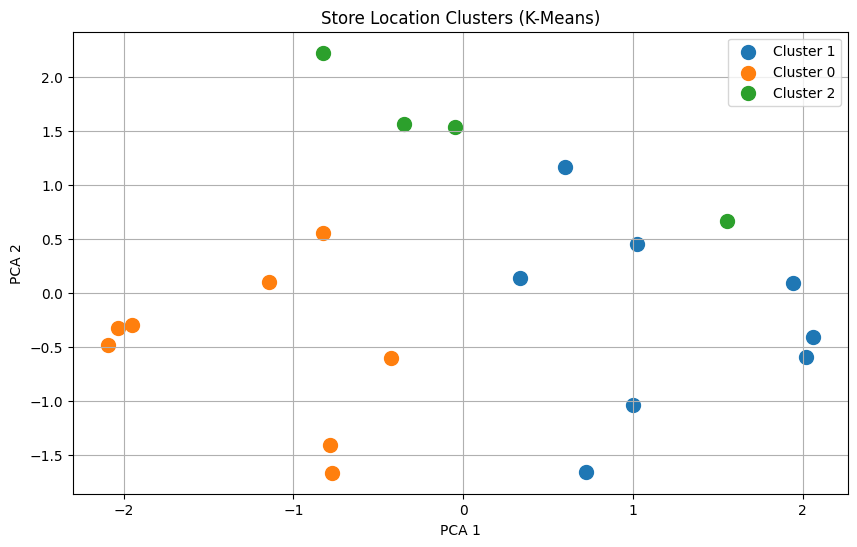

In [6]:
plt.figure(figsize=(10, 6))
for cluster in df["cluster"].unique():
    subset = df[df["cluster"] == cluster]
    plt.scatter(subset["pca1"], subset["pca2"], label=f"Cluster {cluster}", s=100)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Store Location Clusters (K-Means)")
plt.legend()
plt.grid(True)
plt.show()

## Step 7: Cluster Results

In [7]:
df[["city", "state", "cluster"]]

,city,state,cluster
0,Nashik,Maharashtra,1
1,Pune,Maharashtra,0
2,Nagpur,Maharashtra,2
3,Ahmedabad,Gujarat,1
4,Surat,Gujarat,2
5,Bhopal,Madhya Pradesh,0
6,Indore,Madhya Pradesh,2
7,Jaipur,Rajasthan,0
8,Kota,Rajasthan,1
9,Lucknow,Uttar Pradesh,0


In [8]:
import os, joblib

# Ensure the folder exists
os.makedirs("/home/samande371322/Retail360/ml_models", exist_ok=True)

# Save the trained clustering model and scaler
joblib.dump(kmeans, "/home/samande371322/Retail360/ml_models/clustering_model.pkl")
joblib.dump(scaler, "/home/samande371322/Retail360/ml_models/cluster_scaler.pkl")


['/home/samande371322/Retail360/ml_models/cluster_scaler.pkl']